In [1]:
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

We want to generate all the vectors on the vertices an $N$-dimensional cube.  The coordinates for these vectors are either -1 or 1.  Since there are $2^N$ vertices in an $N$-dimensional they can be generated from integers from 0 to $2^N - 1$.

In [2]:
def compute_vector(nr_components, n):
    vector = np.ones((nr_components, ))
    i = 0
    while n > 0:        
        if n % 2 == 1:
            vector[i] = -1
        n //= 2
        i += 1
    return vector

In [3]:
compute_vector(4, 7)

array([-1., -1., -1.,  1.])

Based on `enumerate_vector`, we can write a generator for all vectors using `yield`.

In [4]:
def enumerate_vectors(nr_components):
    for n in range(2**nr_components):
        yield compute_vector(nr_components, n)

For a 3-dimentional cube, this yields the 8 vertices.

In [5]:
for vector in enumerate_vectors(3):
    print(vector)

[1. 1. 1.]
[-1.  1.  1.]
[ 1. -1.  1.]
[-1. -1.  1.]
[ 1.  1. -1.]
[-1.  1. -1.]
[ 1. -1. -1.]
[-1. -1. -1.]


Define the cosine similarity (https://en.wikipedia.org/wiki/Cosine_similarity).

In [6]:
def cos_similarity(v1, v2):
    return np.sum(v1*v2)/(np.linalg.norm(v1)*np.linalg.norm(v2))

We can now compute the similarities for all pairs of vertices in $N$ dimensions.

In [7]:
def compute_similarities(nr_components):
    return [
        cos_similarity(v1, v2)
        for v1, v2 in itertools.product(enumerate_vectors(nr_components),
                                        enumerate_vectors(nr_components))
    ]

In [8]:
similarities = compute_similarities(3)

It would be nice to show this in a historgram.

In [9]:
def plot_similarities(nr_components, bins=20):
    plt.hist(compute_similarities(nr_components),
             bins=bins, density=True)
    plt.xlim(0.0, 1.1);

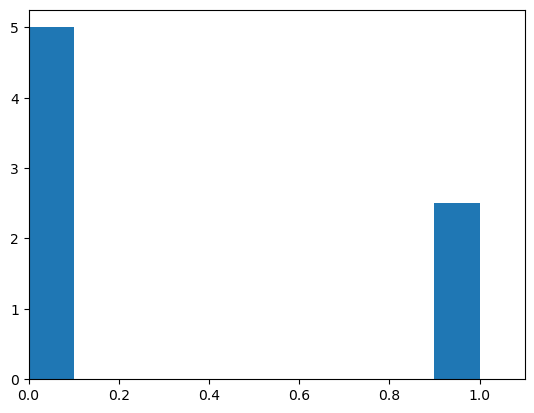

In [10]:
plot_similarities(2)

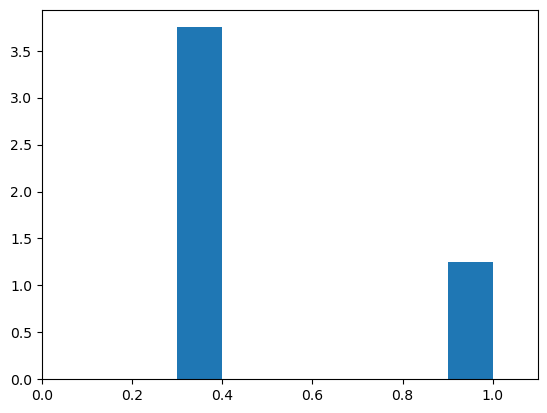

In [11]:
plot_similarities(3)

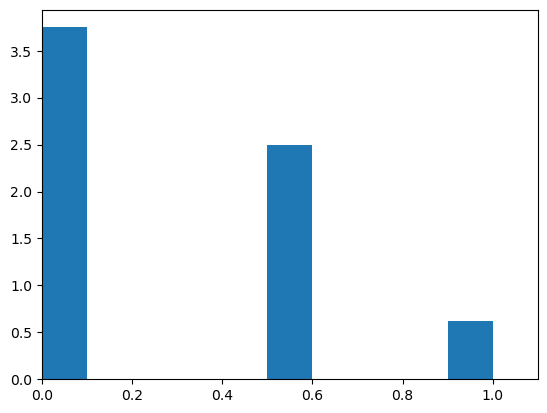

In [12]:
plot_similarities(4)

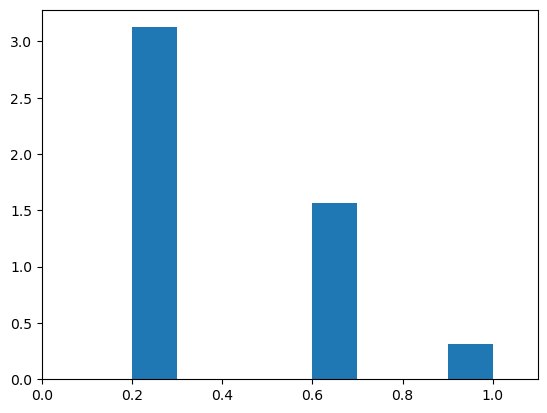

In [13]:
plot_similarities(5)

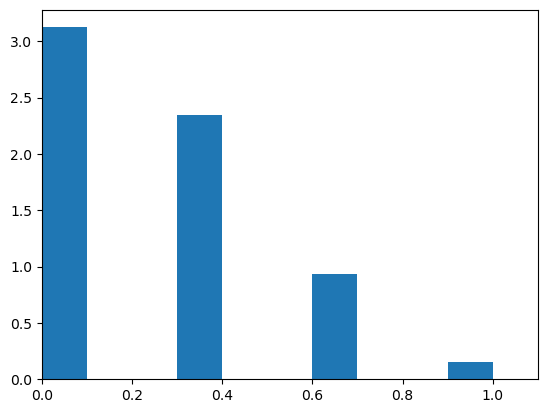

In [14]:
plot_similarities(6)

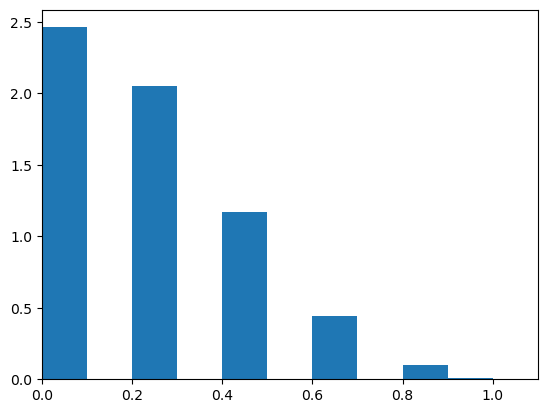

In [15]:
plot_similarities(10)